In [1]:
# import numpy as np
# from random import randint
# from sklearn.utils import shuffle
# from keras.models import Sequential
# from keras.layers import Dense , Activation
# from sklearn.preprocessing import MinMaxScaler

In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator

/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/frame

In [4]:
# pip install keras
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [5]:
# pip install tensorflow==1.2.0 --ignore-installed

In [6]:
train_labels=[]
train_samples=[]

In [7]:
# pip install --ignore-installed --upgrade tensorflow

### Dummy Dataset

In [8]:
for i in range(50):
#       younger people who experienced side effects
    random_younger=randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1) 
    
#      older people who did not experienced side effects
    random_older=randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    #       younger people who did not experienced side effects
    random_younger=randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    
    #      older people who did experienced side effects
    random_older=randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

In [9]:
# for i in train_samples:
#     print(i)

In [10]:
# for i in train_labels:
#     print(i)   
# '0' for people who did not expect side effects '1' who did expect sideEffects

In [11]:
# convert this data into np arra to pass in fit function
train_labels=np.array(train_labels)
train_samples=np.array(train_samples)
train_labels,train_samples=shuffle(train_labels,train_samples)

In [12]:
# reshape data into 2D because fit function does not accept 1D
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))


In [13]:
# All the data values are b/w the range of (0-1)
# for i in scaled_train_samples:
#     print(i)

### Building Sequential Model

In [14]:
model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

Instructions for updating:
Colocations handled automatically by placer.


In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


### Compiling model

In [16]:
model.compile(optimizer=Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Training Model

In [17]:
model.fit(x=scaled_train_samples, y=train_labels, batch_size=10, epochs=30, verbose=2)

Epoch 1/30
 - 1s - loss: 0.6927 - acc: 0.4562
Epoch 2/30
 - 1s - loss: 0.6544 - acc: 0.6014
Epoch 3/30
 - 1s - loss: 0.6227 - acc: 0.6762
Epoch 4/30
 - 1s - loss: 0.5964 - acc: 0.7295
Epoch 5/30
 - 1s - loss: 0.5699 - acc: 0.7676
Epoch 6/30
 - 1s - loss: 0.5424 - acc: 0.7962
Epoch 7/30
 - 1s - loss: 0.5147 - acc: 0.8190
Epoch 8/30
 - 1s - loss: 0.4872 - acc: 0.8395
Epoch 9/30
 - 1s - loss: 0.4605 - acc: 0.8586
Epoch 10/30
 - 1s - loss: 0.4353 - acc: 0.8681
Epoch 11/30
 - 1s - loss: 0.4120 - acc: 0.8829
Epoch 12/30
 - 1s - loss: 0.3910 - acc: 0.8919
Epoch 13/30
 - 1s - loss: 0.3725 - acc: 0.9024
Epoch 14/30
 - 1s - loss: 0.3563 - acc: 0.9133
Epoch 15/30
 - 1s - loss: 0.3420 - acc: 0.9157
Epoch 16/30
 - 1s - loss: 0.3297 - acc: 0.9195
Epoch 17/30
 - 1s - loss: 0.3195 - acc: 0.9186
Epoch 18/30
 - 1s - loss: 0.3107 - acc: 0.9243
Epoch 19/30
 - 1s - loss: 0.3030 - acc: 0.9252
Epoch 20/30
 - 1s - loss: 0.2966 - acc: 0.9248
Epoch 21/30
 - 1s - loss: 0.2914 - acc: 0.9271
Epoch 22/30
 - 1s - lo

### Creating a Validation Set using Keras

In [18]:
model.fit(
      x=scaled_train_samples
    , y=train_labels
    , validation_split=0.1
    , batch_size=10
    , epochs=30
    , verbose=2
)

Train on 1890 samples, validate on 210 samples
Epoch 1/30
 - 1s - loss: 0.2740 - acc: 0.9302 - val_loss: 0.1832 - val_acc: 0.9571
Epoch 2/30
 - 1s - loss: 0.2727 - acc: 0.9307 - val_loss: 0.1841 - val_acc: 0.9571
Epoch 3/30
 - 1s - loss: 0.2718 - acc: 0.9370 - val_loss: 0.1816 - val_acc: 0.9571
Epoch 4/30
 - 1s - loss: 0.2708 - acc: 0.9312 - val_loss: 0.1810 - val_acc: 0.9571
Epoch 5/30
 - 1s - loss: 0.2699 - acc: 0.9349 - val_loss: 0.1801 - val_acc: 0.9571
Epoch 6/30
 - 1s - loss: 0.2690 - acc: 0.9328 - val_loss: 0.1786 - val_acc: 0.9571
Epoch 7/30
 - 1s - loss: 0.2682 - acc: 0.9349 - val_loss: 0.1772 - val_acc: 0.9571
Epoch 8/30
 - 1s - loss: 0.2674 - acc: 0.9312 - val_loss: 0.1765 - val_acc: 0.9571
Epoch 9/30
 - 1s - loss: 0.2665 - acc: 0.9402 - val_loss: 0.1739 - val_acc: 0.9571
Epoch 10/30
 - 1s - loss: 0.2659 - acc: 0.9312 - val_loss: 0.1739 - val_acc: 0.9571
Epoch 11/30
 - 1s - loss: 0.2652 - acc: 0.9339 - val_loss: 0.1738 - val_acc: 0.9571
Epoch 12/30
 - 1s - loss: 0.2645 - acc

### Test Set

In [25]:
test_lables=[]
test_samples=[]

In [26]:
for i in range(10):
    #     younger individuals who did experience side effects
    random_younger=randint(13,64)
    test_samples.append(random_younger)
    test_lables.append(1)
    
      #     older individuals who did not experience side effects
    random_older=randint(65,100)
    test_samples.append(random_older)
    test_lables.append(0)
    
for i in range(200):
    #     younger individuals who did not experience side effects
    random_younger=randint(13,64)
    test_samples.append(random_younger)
    test_lables.append(0)
    
      #     older individuals who did experience side effects
    random_older=randint(65,100)
    test_samples.append(random_older)
    test_lables.append(1)

In [27]:
### Convert the data in np_arra formate
test_lables=np.array(test_lables)
test_samples=np.array(test_samples)

# Shuffle 
test_lables, test_samples = shuffle(test_lables, test_samples)

# tranform to 2D 
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))


In [28]:
predictions = model.predict(
      x=scaled_test_samples
    , batch_size=10
    , verbose=0
)  

In [29]:
for i in predictions:
    print(i)

[0.96857184 0.0314282 ]
[0.96286935 0.03713069]
[0.04703024 0.9529698 ]
[0.06578821 0.9342118 ]
[0.08419898 0.915801  ]
[0.03067345 0.96932656]
[0.15207899 0.847921  ]
[0.1962262 0.8037738]
[0.15207897 0.847921  ]
[0.08419898 0.915801  ]
[0.33235514 0.66764486]
[0.33235514 0.66764486]
[0.9670596  0.03294033]
[0.41549268 0.5845073 ]
[0.01670206 0.98329794]
[0.09131082 0.9086892 ]
[0.5037359 0.4962641]
[0.3729858 0.6270142]
[0.02813818 0.97186184]
[0.71209174 0.28790826]
[0.03067345 0.96932656]
[0.10718396 0.892816  ]
[0.591747   0.40825298]
[0.67424333 0.32575667]
[0.85768396 0.14231604]
[0.169641 0.830359]
[0.03967476 0.96032524]
[0.85768396 0.14231604]
[0.96694046 0.03305952]
[0.0605318  0.93946815]
[0.9106905  0.08930945]
[0.9683436  0.03165638]
[0.15207899 0.847921  ]
[0.9679984  0.03200168]
[0.10718396 0.892816  ]
[0.0714663 0.9285337]
[0.03342929 0.9665707 ]
[0.9692469  0.03075316]
[0.06578821 0.9342118 ]
[0.01530334 0.9846966 ]
[0.1962262 0.8037738]
[0.2940743 0.7059257]
[0.96811

In [30]:
rounded_predictions=np.argmax(predictions, axis=-1)

In [32]:
# for i in rounded_predictions:
#     print(i)

In [33]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [35]:
cm = confusion_matrix(y_true=test_lables, y_pred=rounded_predictions)

In [36]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [37]:
# providing labels to confusion matrix
cm_plot_labels = ['no_side_effects','had_side_effects']

Confusion matrix, without normalization
[[197  13]
 [ 10 200]]


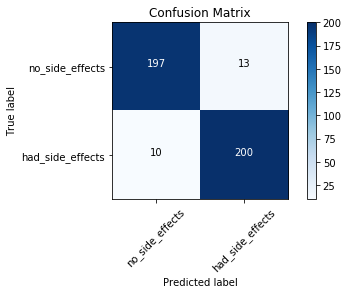

In [38]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')